In [1]:
import pandas as pd

train_df = pd.read_csv('train.tsv', sep='\t')
val_df = pd.read_csv('val.tsv', sep='\t')

val_df_liar = pd.read_csv('../LIAR/val.tsv', sep='\t')
val_df_isot = pd.read_csv('../ISOT/val.tsv', sep='\t')
val_df_fnn = pd.read_csv('../FakeNewsNet/val.tsv', sep='\t')
val_df_covid = pd.read_csv('../Covid-19/val.tsv', sep='\t')

In [2]:
# no null values in dataset
train_df['title'].isnull().sum()

0

In [3]:
val_df['title'].isnull().sum()

0

In [4]:
print('Train real news:', train_df[train_df['true']==1].shape[0])
print('Train fake news:', train_df[train_df['true']==0].shape[0])

print('Val real news:', val_df[val_df['true']==1].shape[0])
print('Val fake news:', val_df[val_df['true']==0].shape[0])

Train real news: 7911
Train fake news: 8283
Val real news: 1944
Val fake news: 2104


In [5]:
#sample real news
train_df[train_df['true']==1].sample(n=1)['title'].iloc[0]

'GaiaPortal: Interwebs of Gaia energetics are strengthened'

In [6]:
#sample fake news
train_df[train_df['true']==0].sample(n=1)['title'].iloc[0]

'Ai Weiwei and Warhol, Together Again - The New York Times'

In [7]:
# word count in news
word_counts_train = train_df['title'].apply(lambda x: len(x.split()))
word_counts_train.describe()

count    16194.000000
mean        12.423367
std          4.116123
min          1.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         72.000000
Name: title, dtype: float64

In [8]:
word_counts_val = val_df['title'].apply(lambda x: len(x.split()))
word_counts_val.describe()

count    4048.000000
mean       12.410079
std         4.028907
min         1.000000
25%        10.000000
50%        13.000000
75%        15.000000
max        43.000000
Name: title, dtype: float64

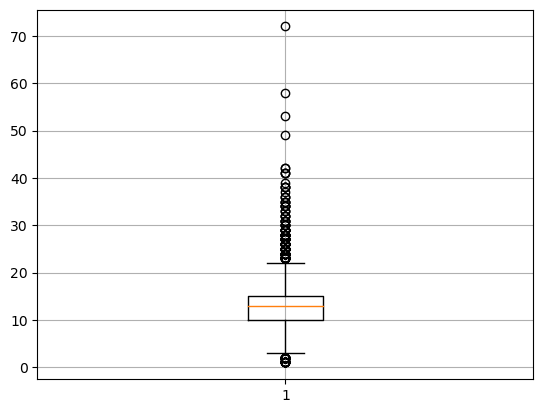

In [9]:
import matplotlib.pyplot as plt

plt.boxplot(word_counts_train)
plt.grid(True)
plt.show()

In [10]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
stop_words = stopwords.words('english')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()

In [12]:
def data_preprocessing(review):
    
    # data cleaning
    review = re.sub(re.compile('<.*?>'), '', review) # remove html tags
    review = re.sub('[^A-Za-z0-9]+', ' ', review) # taking only words
    
    # lowercase
    review = review.lower()
    
    # tokenization
    tokens = nltk.word_tokenize(review)
    
    # stop word removal
    review = [word for word in tokens if word not in stop_words]
    
    # lemmatization
    review = [lemmatizer.lemmatize(word) for word in review]
    
    # join words in preprocessed review
    review = ' '.join(review)
    
    return review

In [13]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
train_df['preprocessed_title'] = train_df['title'].apply(lambda review: data_preprocessing(review))
train_df

,title,true,preprocessed_title
0,Live at Truthdig: Robert Scheer and Thomas Fra...,1,live truthdig robert scheer thomas frank talk ...
1,Hillary Clinton’s Private Speech From 2015 Men...,1,hillary clinton private speech 2015 mentioned ...
2,"David Samson, Ally of Christie, Admits to Brib...",0,david samson ally christie admits bribery airl...
3,Comment on WATCH: Hillary Aide RUSHES to Her S...,1,comment watch hillary aide rush side help clim...
4,George Soros-Tied Activists Behind Campaign to...,0,george soros tied activist behind campaign imp...
...,...,...,...
16189,Trump whistles his dogs | Intrepid Report.com,1,trump whistle dog intrepid report com
16190,"Report Shows Vast Reach of Russian Doping: 1,0...",0,report show vast reach russian doping 1 000 at...
16191,Trolls 101 —- How To Identify Trolls And Forum...,1,troll 101 identify troll forum spy
16192,This Irish TV channel killed their weather pre...,1,irish tv channel killed weather presenter hall...


In [15]:
val_df['preprocessed_title'] = val_df['title'].apply(lambda review: data_preprocessing(review))
val_df

,title,true,preprocessed_title
0,"NYT, WSJ, WaPost Editorial Boards Blast Trump’...",0,nyt wsj wapost editorial board blast trump bor...
1,Fabio’s Advice to Americans: ’Don’t Ever Give ...,0,fabio advice american ever give gun
2,Jesse Watters: Under Armour Should ’Rip Up’ St...,0,jesse watters armour rip steph curry contract ...
3,"Hillary FRANTIC As Dirty Secret Implodes, Gets...",1,hillary frantic dirty secret implodes get wors...
4,Obama White House Refuses to Call Trump ’Legit...,0,obama white house refuse call trump legitimate...
...,...,...,...
4043,Anderson Cooper Absolutely OWNS Kellyanne Conw...,1,anderson cooper absolutely owns kellyanne conw...
4044,Steyn: Expect More Beating-Type Incidents as L...,0,steyn expect beating type incident long left i...
4045,"Tom Hanks, ’Game Change’ Team Prepping HBO Min...",0,tom hank game change team prepping hbo miniser...
4046,"H.I.V. Cases Surpass a Million in Russia, but ...",0,h v case surpass million russia little done ne...


In [16]:
val_df_liar['preprocessed_title'] = val_df_liar['statement'].apply(lambda review: data_preprocessing(review))
val_df_isot['preprocessed_title'] = val_df_isot['title'].apply(lambda review: data_preprocessing(review))
val_df_fnn['preprocessed_title'] = val_df_fnn['title'].apply(lambda review: data_preprocessing(review))
val_df_covid['preprocessed_title'] = val_df_covid['title'].apply(lambda review: data_preprocessing(review))

print('ISOT length:', len(val_df_isot))
print('LIAR length:', len(val_df_liar))
print('FakeNewsDataset length:', len(val_df))
print('FakeNewsNet length:', len(val_df_fnn))
print('Covid-19 length:', len(val_df_covid))

ISOT length: 8980
LIAR length: 1589
FakeNewsDataset length: 4048
FakeNewsNet length: 4639
Covid-19 length: 624


In [17]:
X_val_liar = val_df_liar['preprocessed_title']
y_val_liar = val_df_liar['label']

X_val_isot = val_df_isot['preprocessed_title']
y_val_isot = val_df_isot['true']

X_val_fnn = val_df_fnn['preprocessed_title']
y_val_fnn = val_df_fnn['true']

X_val_covid = val_df_covid['preprocessed_title']
y_val_covid = val_df_covid['true']

In [18]:
X_train = train_df['preprocessed_title']
X_val = val_df['preprocessed_title']

y_train = train_df['true']
y_val = val_df['true']

print('Train data:', X_train.shape, y_train.shape)
print('Test data:', X_val.shape, y_val.shape)

Train data: (16194,) (16194,)
Test data: (4048,) (4048,)


In [19]:
# vectorizing text data: TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_news_tfidf = vectorizer.fit_transform(X_train)
X_val_news_tfidf = vectorizer.transform(X_val)

print('X_train_new_tfidf shape:', X_train_news_tfidf.shape)
print('X_test_news_tfidf shape:', X_val_news_tfidf.shape)

X_train_new_tfidf shape: (16194, 2403)
X_test_news_tfidf shape: (4048, 2403)


In [20]:
X_val_liar_tfidf = vectorizer.transform(X_val_liar)
X_val_isot_tfidf = vectorizer.transform(X_val_isot)
X_val_fnn_tfidf = vectorizer.transform(X_val_fnn)
X_val_covid_tfidf = vectorizer.transform(X_val_covid)

In [21]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

clf = MultinomialNB(alpha=1)
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val, y_pred))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.3084025854108956
LIAR: 0.47661188369152974
FakeNewsDataset: 0.8433667781493868
FakeNewsNet: 0.5555961960497439
Covid-19: 0.5650459921156373


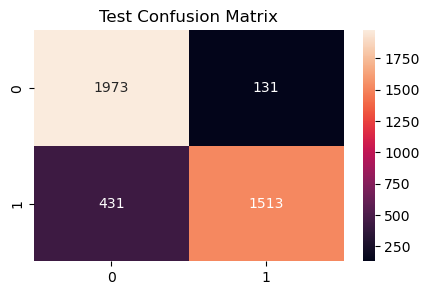

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val, y_pred))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.5953747744792521
LIAR: 0.6771378708551484
FakeNewsDataset: 0.9351485148514852
FakeNewsNet: 0.81999481999482
Covid-19: 0.764


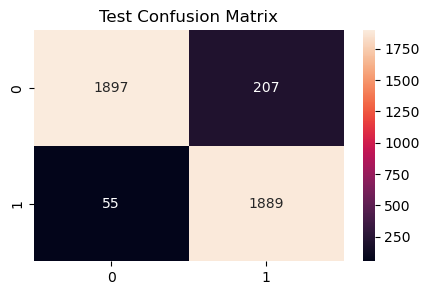

In [24]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [23]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val, y_pred))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.6263074484944532
LIAR: 0.6906474820143885
FakeNewsDataset: 0.9240166137307598
FakeNewsNet: 0.8456021140052851
Covid-19: 0.7738095238095237


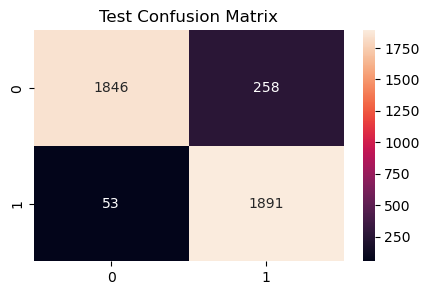

In [24]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [26]:
clf.estimator_errors_

array([0.20322342, 0.23487013, 0.44364246, 0.45747124, 0.47890185,
       0.44704069, 0.4856537 , 0.48067188, 0.48530202, 0.48819222,
       0.48746174, 0.48667724, 0.48650716, 0.49020155, 0.49073281,
       0.4914607 , 0.49229473, 0.49218586, 0.49339807, 0.48911589,
       0.49164002, 0.49286652, 0.48764918, 0.49338433, 0.4933135 ,
       0.4923626 , 0.48977705, 0.48877366, 0.48785575, 0.49396112,
       0.49398653, 0.49306179, 0.49454134, 0.4807809 , 0.48544718,
       0.494404  , 0.4856979 , 0.49414342, 0.49109742, 0.49431551,
       0.49200686, 0.49360451, 0.49474397, 0.494323  , 0.49493191,
       0.48945205, 0.48790213, 0.49448614, 0.49506846, 0.49447651])

In [28]:
clf.estimators_[0].n_features_in_

2403

In [29]:
vectorizer.vocabulary_

{'live': 1269,
 'robert': 1831,
 'thomas': 2151,
 'frank': 880,
 'talk': 2108,
 'new': 1461,
 'book': 292,
 'hillary': 1015,
 'clinton': 437,
 'private': 1671,
 'speech': 2012,
 'palestinian': 1536,
 'right': 1819,
 'actually': 64,
 'gave': 903,
 'david': 573,
 'ally': 119,
 'christie': 418,
 'admits': 72,
 'airline': 100,
 'york': 2395,
 'time': 2170,
 'comment': 466,
 'watch': 2325,
 'aide': 94,
 'rush': 1858,
 'side': 1958,
 'help': 1004,
 'one': 1507,
 'step': 2043,
 'george': 909,
 'soros': 1996,
 'tied': 2166,
 'activist': 62,
 'behind': 243,
 'campaign': 350,
 'trump': 2227,
 'israel': 1125,
 'violent': 2291,
 'shocking': 1945,
 'predicted': 1648,
 'donald': 653,
 'rise': 1824,
 'power': 1641,
 'inside': 1096,
 'mission': 1391,
 'official': 1498,
 'warn': 2317,
 'another': 149,
 'war': 2314,
 'aid': 93,
 'hit': 1021,
 'syria': 2099,
 'fire': 838,
 'bombing': 288,
 'senator': 1916,
 'mark': 1322,
 'mock': 1395,
 'veteran': 2282,
 'race': 1717,
 'pope': 1625,
 'francis': 878,
 'no

In [30]:
top_words = []

for i in range(50):
    for term, idx in vectorizer.vocabulary_.items():
        if idx == np.where(clf.estimators_[i].feature_importances_ == 1)[0][0]:
            top_words.append(term)

In [31]:
def words_in_string(word_list, a_string):
    return set(word_list).intersection(a_string.split())

In [32]:
matches = 0
for sentence in X_val_fnn:
    if len(words_in_string(top_words, sentence)) > 0:
        matches += 1
        
print(matches)

714


In [33]:
matches = 0
for sentence in X_val_covid:
    if len(words_in_string(top_words, sentence)) > 0:
        matches += 1
        
print(matches)

77


In [34]:
for word in top_words:
    print(word)

york
breitbart
hillary
time
border
trump
comment
election
migrant
islamic
texas
war
video
illegal
terror
american
pope
breaking
delingpole
house
gun
email
america
inauguration
cartel
breitbart
world
trump
anti
de
pen
latest
reason
york
time
sanctuary
york
housing
attack
wikileaks
fake
paris
parenthood
session
coulter
russia
report
profit
veteran
exclusive


In [27]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val, y_pred))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.6429225137278828
LIAR: 0.705349794238683
FakeNewsDataset: 0.6790697674418604
FakeNewsNet: 0.8320591233435269
Covid-19: 0.7644710578842315


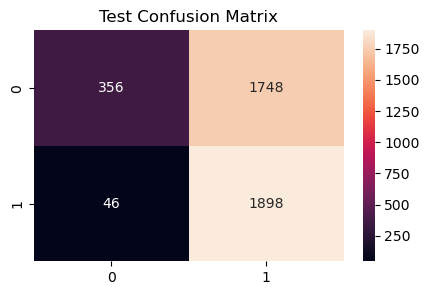

In [28]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [29]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_news_tfidf, y_train)

y_pred = xgb_model.predict(X_val_news_tfidf)
y_pred_liar = xgb_model.predict(X_val_liar_tfidf)
y_pred_isot = xgb_model.predict(X_val_isot_tfidf)
y_pred_fnn = xgb_model.predict(X_val_fnn_tfidf)
y_pred_covid = xgb_model.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val, y_pred))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.6062309298217441
LIAR: 0.6938083121289228
FakeNewsDataset: 0.9283974671212859
FakeNewsNet: 0.8460097414762083
Covid-19: 0.7683168316831682


In [30]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_covid = clf.predict(X_val_covid_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val, y_pred))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val_covid, y_pred_covid))

F1 scores: 
ISOT: 0.6280927027873474
LIAR: 0.683565694972539
FakeNewsDataset: 0.9298928919182083
FakeNewsNet: 0.8405177830840769
Covid-19: 0.7689243027888445
